In [1]:
from PyAWD.AcousticWaveDataset import *
import numpy as np
import sklearn
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [2]:
N = 200
nx = 200
train = AcousticWaveDataset(N, nx=nx)

  0%|          | 0/200 [00:00<?, ?it/s]

In [8]:
M = N//5
test = AcousticWaveDataset(M, nx=nx)

  0%|          | 0/40 [00:00<?, ?it/s]

In [11]:
norm_mses = []
for s in range(10, 0, -1):
    sx = s/10
    train.set_scaling_factor(sx)
    test.set_scaling_factor(sx)
    X = [train[i][1].flatten() for i in range(N)]
    Y = [train[i][0][0] for i in range(N)]
    lr = LinearRegression().fit(X, Y)
    X_test = np.array([test[i][1].flatten() for i in range(M)])
    Y_test = np.array([test[i][0][0] for i in range(M)])
    Y_hat = lr.predict(X_test)
    MAE = np.mean(np.abs(Y_test-Y_hat))
    norm_mses.append(MAE/((nx//2)*sx))

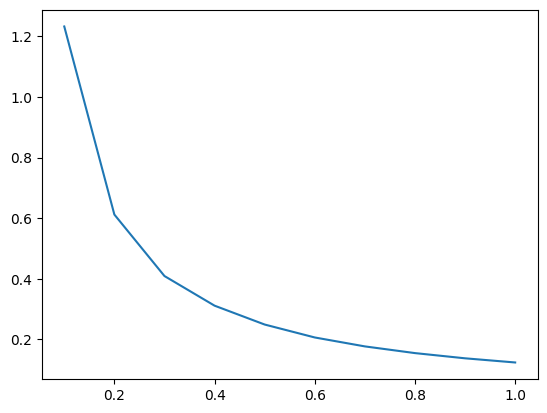

In [12]:
plt.plot(np.arange(0.1, 1.1, 0.1), norm_mses[::-1])